<a href="https://colab.research.google.com/github/Harvard-IACS/2021-CS109B/blob/master/L17_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance comparision on SOTAs

In [ ]:
# Get the imagenet data & helper files 
!wget https://cs109b-course-data.s3.amazonaws.com/GEC/GEC.zip

# Unzip all the files 
!unzip -qq GEC.zip
!cp GEC/helper.py helper.py

--2021-03-09 05:59:44--  https://cs109b-course-data.s3.amazonaws.com/GEC/GEC.zip
Resolving cs109b-course-data.s3.amazonaws.com (cs109b-course-data.s3.amazonaws.com)... 52.217.72.124
Connecting to cs109b-course-data.s3.amazonaws.com (cs109b-course-data.s3.amazonaws.com)|52.217.72.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173841102 (166M) [application/zip]
Saving to: ‘GEC.zip.1’

GEC.zip.1           100%[===================>] 165.79M  44.7MB/s    in 3.9s    

2021-03-09 05:59:49 (42.6 MB/s) - ‘GEC.zip.1’ saved [173841102/173841102]

replace GEC/helper.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace GEC/idx2name.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# Import required libraries
import sys, os, time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
colors = ['k', 'g', 'r','b','c']
plt.style.use('seaborn-whitegrid')
import helper
import pickle

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import timeit

## Loading the data

In [ ]:
# Useful dictionary to go from label index to actual label
with open('GEC/idx2name.pkl', 'rb') as handle:
    keras_idx_to_name = pickle.load(handle)

In [ ]:
# Loading input image and labels
x_val = np.load("GEC/x_val.npy") # loaded as RGB
y_val = np.load("GEC/y_val.npy")

# One hot encoding the labels
y_val_one_hot = to_categorical(y_val, 1000)

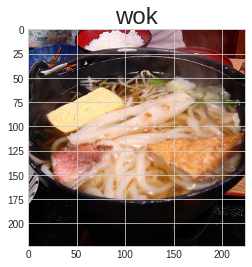

In [ ]:
# Print a sample image and set the label as title
plt.title(keras_idx_to_name[y_val[0]],fontsize=24,y=0.88)
plt.imshow(x_val[0].astype('int64'))

### ⏸ What is the label for the first image in the validation set?


#### A. Cabbage Butterfly
#### B. Mixing bowl
#### C. Wok
#### D. French horn

## Benchmark models

In [ ]:
# Helper function to get key stats
# (evaluation speed, top-1 % accuracy, total model parameters)
def model_stats(model,x_val,name):
    #Time for evaluation
    time = timeit.timeit(lambda: model.predict(x_val, verbose=1), number=1)
    # Accuracy
    y_pred = model.predict(x_val)
    top_1 = np.any(np.argsort(y_pred)[:,-1:].T == y_val_one_hot.argmax(axis=1),axis=0).mean()
    # Model size 
    params = model.count_params()
    return (time,top_1,params,name)

## SOTA architectures

For this exercise, we will consider the following SOTAs:
- VGG16
- VGG19
- InceptionV3
- ResNet50
- MobileNet

In [ ]:
# VGG16 stats
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Preprocess step
# We need to call the data because some preprocess steps
# change the value inplace
x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the VGG16 model
model = VGG16()

# Collect stats 
vgg16stats = model_stats(model,x_val,'VGG16')

4/4 [==============================] - 28s 6s/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [ ]:
# VGG19 stats
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the VGG19 model
model = VGG19()
# Collect stats 
vgg19stats = model_stats(model,x_val,'VGG19')

4/4 [==============================] - 35s 8s/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [ ]:
# Inception Stats
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the InceptionV3 model
model = InceptionV3()

# Collect stats 
inceptionstats = model_stats(model,x_val,'Inception')

96116736/96112376 [==============================] - 1s 0us/step


ValueError: ignored

In [ ]:
# Resnet50 stats
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the ResNet50 model
model = ___

# Collect stats 
resnetstats = model_stats(model,x_val,'Resnet50')

In [ ]:
# MobileNet stats
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the MobielNetV2 model
model = ___

# Collect stats 
mobilestats = model_stats(model,x_val,'MobileNet')

### ⏸ Which SOTA architecture from above has the **highest** number of trainable parameters?


#### A. VGG-16
#### B. VGG-19
#### C. ResNet50
#### D. MobileNet

In [ ]:
# Use the helper code below 
# to plot the model stats for each SOTA
max_ylim = int(vgg19stats[0])+10
fig, ax  = plt.subplots(figsize=(10,6))
for i,val in enumerate([vgg16stats, vgg19stats, inceptionstats,resnetstats, mobilestats]):
    r = val[2]/10**9 + 0.04
    helper.ellipse(val[0]/max_ylim,val[1],width=r,height=0.44*r,color = colors[i],ax=ax)
    ax.text(val[0]/max_ylim + 0.035, val[1]+r/4+ 0.004, val[3], va='center', ha='center',fontsize=12)
    
ax.set_ylim([0.6,0.85])
ax.set_ylabel('Top-1 accuracy [%]',fontsize=20)
ax.set_xlabel('Time for evaluation [s]',fontsize=20)
ax.set_xticklabels(range(0,60,8));
ax.set_yticklabels(range(50,110,10));
for axis in ['bottom','left']:
  ax.spines[axis].set_linewidth(3)
  ax.spines[axis].set_color('k')

### 🍲 Larger dataset

Go back and take a larger sample of images, do your results remain consistent?